# Analysis 1

# User Session Activities

In [5]:
#Converting the .txt file into a .csv file and parsing the data
import csv
import itertools

with open('./Data/airbnb_session_data.txt', 'r',  encoding="utf8") as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line for line in stripped if any(line))
    grouped = zip(*[lines] * 1)
    with open('./Output/extracted.csv', 'w',  encoding="utf8",newline='') as out_file:
        writer = csv.writer(out_file) 
        writer.writerows(grouped)

In [8]:
# Making csv file from the text file
f = open('./Output/extracted.csv',encoding="utf8")
csv_f = csv.reader(f)
rows=(row[0].split('|') for row in csv_f)
with open('./Data/output.csv','w',encoding="utf8",newline='') as output_file:
        writer = csv.writer(output_file) 
        writer.writerows(rows)
    

In [9]:
# reading the csv dile
import pandas as pd
df=pd.read_csv(r'./Data/output.csv')

In [10]:
#Converting the datatypes of time
df['ts_max'] = pd.to_datetime(df['ts_max'], coerce=True)
df['ts_min'] = pd.to_datetime(df['ts_min'], coerce=True)

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  if __name__ == '__main__':
C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  from ipykernel import kernelapp as app


In [11]:
# Difference between the logged in time and logged out time
df['diff'] = df['ts_max'] - df['ts_min']

In [12]:
#Extrating only the minutes from the date field using lamda function
import numpy as np

df['minutes_online']=df['diff'].apply(lambda x: x/np.timedelta64(1,'m'))
#df['min']=df['diff'].dt.hour

In [13]:
df.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,...,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request,diff,minutes_online
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0,00:23:01,23.016667
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0,00:15:33,15.550000
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0,00:03:23,3.383333
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0,00:10:30,10.500000
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0,00:00:02,0.033333


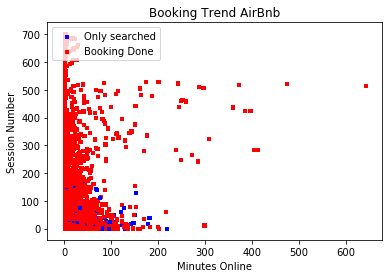

False    6520
True     1236
Name: did_search, dtype: int64
False    7611
True      145
Name: sent_booking_request, dtype: int64


In [15]:
#Seeing the users who have only searched and not booked at Airbnb
import matplotlib.pyplot as plt

results=np.where((df.did_search ==1) & (df.sent_booking_request==0) ,'r','b')
r1=(df.did_search ==1).value_counts()


results_1=np.where(df.sent_booking_request==1,'b','r')
r2=(df.sent_booking_request ==1).value_counts()
#results_2=np.where(df.sent_message==1,'b','r')
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(111)
#ax3 = fig.add_subplot(111)

ax1.scatter(df.minutes_online,df.dim_session_number, s=10, c=results, marker="s", label='Only searched')
ax1.scatter(df.minutes_online,df.dim_session_number, s=10, c=results_1, marker="s", label='Booking Done')
#ax1.scatter(df.minutes_online,df.dim_session_number, s=10, c=results_2, marker="s", label='third')
plt.legend(loc='upper left');
plt.xlabel('Minutes Online')
plt.ylabel('Session Number')
plt.title('Booking Trend AirBnb')
plt.show()
print(r1)
print(r2)

In [16]:
df.drop(df.columns[[1,2,3,4,5,6,7,11,12,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)

In [17]:
df.fillna(0)

,id_visitor,did_search,sent_message,sent_booking_request,minutes_online
0,ed1329a6-064d-47e9-93bc-93f5a50822df,0,0,0,23.016667
1,ed1329a6-064d-47e9-93bc-93f5a50822df,0,0,0,15.550000
2,ed1329a6-064d-47e9-93bc-93f5a50822df,0,0,0,3.383333
3,ed1329a6-064d-47e9-93bc-93f5a50822df,0,0,0,10.500000
4,ed1329a6-064d-47e9-93bc-93f5a50822df,0,0,0,0.033333
5,ed1329a6-064d-47e9-93bc-93f5a50822df,0,0,0,0.066667
6,ed1329a6-064d-47e9-93bc-93f5a50822df,0,0,0,1.216667
7,ed1329a6-064d-47e9-93bc-93f5a50822df,0,0,0,4.450000
8,ed1329a6-064d-47e9-93bc-93f5a50822df,0,0,0,0.550000
9,ed1329a6-064d-47e9-93bc-93f5a50822df,1,0,0,27.633333


In [30]:
# Grouping the dataset by id_visitor and seeing how many times the user was online and the minutes
df_user=df.groupby("id_visitor").agg(['sum','count']).astype(int)

In [31]:
df_user.columns = df_user.columns.droplevel(0)

In [33]:
#Renaming columns
df_user.columns.values[0] = 'Searched_Sum'
df_user.columns.values[1] = 'Searched_Count' 
df_user.columns.values[2] = 'MessageSent_Sum' 
df_user.columns.values[3] = 'MessageSent_Count' 
df_user.columns.values[4] = 'Booked_Sum' 
df_user.columns.values[5] = 'Booked_Count' 
df_user.columns.values[6] = 'Minutes_Onlne_Sum' 
df_user.columns.values[7] = 'No_Of_Times_Online_Count' 

In [34]:
df_user.drop(df_user.columns[[1,3,5]], axis=1, inplace=True)

In [22]:
# Average Minutes spend by a user at sessions 
df_user['Avg_Minutes_Online']=df_user['Minutes_Onlne_Sum']/df_user['No_Of_Times_Online_Count']

In [23]:
df_user.head()

,Searched_Sum,MessageSent_Sum,Booked_Sum,Minutes_Onlne_Sum,No_Of_Times_Online_Count,Avg_Minutes_Online
id_visitor,,,,,,
0331fa39-455f-4f47-9db2-18ce37ee90e4,7,0,0,245,22,11.136364
04862ee0-26d8-4f8b-a69d-9a5821d08021,5,1,0,54,23,2.347826
04b8e876-3afc-41cf-aff9-50b64b4e2ae3,18,13,3,533,45,11.844444
060a3cd7-a494-4b49-8551-c22c8caacbd7,4,9,1,268,25,10.720000
06984869-ca80-40f2-b9ed-09676d178a80,5,8,0,291,35,8.314286


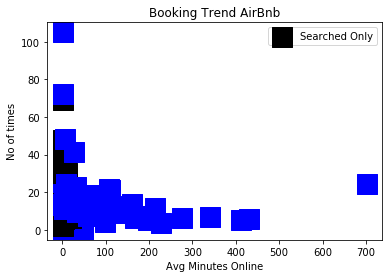

In [24]:
import matplotlib.cm as cm

res=np.where((df_user.Searched_Sum>0) & (df_user.MessageSent_Sum==0) & (df_user.Booked_Sum==0),'k','b')
#res_1=np.where((df_user.MessageSent_Sum>0)  & (df_user.Booked_Sum==0))
#res_2=np.where((df_user.Searched_Sum>0) & (df_user.Booked_Sum>0) & (df_user.MessageSent_Sum>0))
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(111)
#ax3 = fig.add_subplot(111)

ax1.scatter(df_user.No_Of_Times_Online_Count,df_user.Avg_Minutes_Online, s=400, c=res, cmap='RdPu', marker="s", label='Searched Only' )
#ax1.scatter(df_user.No_Of_Times_Online_Count,df_user.Avg_Minutes_Online, s=200, c=res_1, marker="s", label='second')
#ax1.scatter(df_user.No_Of_Times_Online_Count,df_user.Avg_Minutes_Online, s=100, c=res_2, marker="s", label='third')
plt.xlabel('Avg Minutes Online')
plt.ylabel('No of times')
plt.title('Booking Trend AirBnb')
plt.legend(loc='upper right');
plt.show()

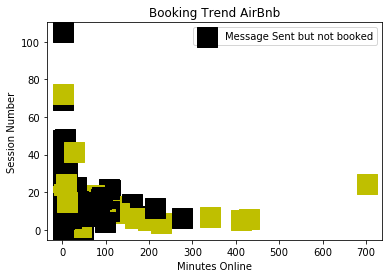

In [25]:
res_1=np.where((df_user.MessageSent_Sum>0)  & (df_user.Booked_Sum==0), 'y', 'k')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_user.No_Of_Times_Online_Count,df_user.Avg_Minutes_Online, s=400, c=res_1, cmap='RdPu', marker="s", label='Message Sent but not booked' )
plt.legend(loc='upper right');
plt.xlabel('Minutes Online')
plt.ylabel('Session Number')
plt.title('Booking Trend AirBnb')
plt.show()

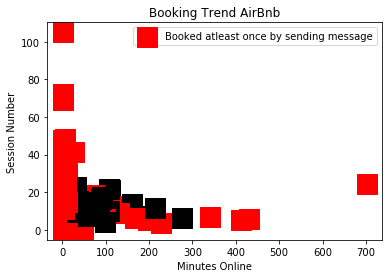

In [27]:
res_2=np.where((df_user.Searched_Sum>0) & (df_user.Booked_Sum>0) & (df_user.MessageSent_Sum>0), 'k', 'r')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_user.No_Of_Times_Online_Count,df_user.Avg_Minutes_Online, s=400, c=res_2, cmap='RdPu', marker="s", label='Booked atleast once by sending message' )
plt.legend(loc='upper right');
plt.xlabel('Minutes Online')
plt.ylabel('Session Number')
plt.title('Booking Trend AirBnb')
plt.show()
